In [6]:
#importing all necessary modules needed for project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
import time
from sklearn import linear_model
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor



import re
import string
import pandas as pd

from collections import Counter

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import Normalizer, StandardScaler

from sklearn.cluster import KMeans

from sklearn import manifold

import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import numpy as np
from webdriver_manager.chrome import ChromeDriverManager

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ronitmehta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [97]:
#generates a dataframe of all current NFL players using pd.read_html

def p_gen():

    e = ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L','M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

    #starts at the webpage that contains all the players whose last name begins with A, and creates an original dataframe
    url = 'https://newsday.sportsdirectinc.com/football/nfl-players.aspx?page=/data/nfl/players/A_players.html'
    th = pd.read_html(url)
    p = th[2].rename(columns = th[2].iloc[0]).loc[1:]
    p2 = pd.DataFrame({'player': p['Player'], 'pos': p['Pos']})
    c = 0
    for player in p2['player']:
        y = player.split(',')
        yy = y[1].strip() + ' ' + y[0]
        p2['player'].iloc[c] = yy
        c += 1

    #repeats the same process as above, but adds the dataframe of each letter to the already existing dataframe to create one large dataset
    for i in e:
        urll = f'https://newsday.sportsdirectinc.com/football/nfl-players.aspx?page=/data/nfl/players/{i}_players.html'
        th = pd.read_html(urll)
        p1 = th[2].rename(columns = th[2].iloc[0]).loc[1:]
        p3 = pd.DataFrame({'player': p1['Player'], 'pos': p1['Pos']})
        c = 0
        for player in p3['player']:
            y = player.split(',')
            yy = y[1].strip() + ' ' + y[0]
            p3['player'].iloc[c] = yy
            c += 1
        p2 = pd.concat([p2, p3], axis=0)
        p2 = p2.reset_index(drop=True)
    return p2



,player,pos
0,Ameer Abdullah,RB
1,Johnathan Abram,S
2,Keshunn Abram,WR
3,Davante Adams,WR
4,Jamal Adams,S
...,...,...
2672,Kevin Zeitler,G
2673,Greg Zuerlein,K
2674,Jabari Zuniga,DL
2675,Brandon Zylstra,WR


In [113]:
#takes in the above dataframe and returns only the players that are fantasy applicable (QB, RB, FB, WR, TE, K)
def apply(p2):
    f_apl = p2[(p2.pos == 'RB') | (p2.pos == 'TE') | (p2.pos == 'QB') | (p2.pos == 'FB') | (p2.pos == 'K') | (p2.pos == 'WR')]
    f_apl = f_apl.reset_index(drop = True)
    #also creates an empty column for player handles to go eventually go into
    f_apl["handle"] = " "
    return f_apl

,player,pos,handle
0,Ameer Abdullah,RB,
1,Keshunn Abram,WR,
2,Davante Adams,WR,
3,Nelson Agholor,WR,
4,Jamal Agnew,WR,
...,...,...,...
882,Olamide Zaccheaus,WR,
883,Bailey Zappe,QB,
884,Greg Zuerlein,K,
885,Brandon Zylstra,WR,


In [117]:
#takes in a string generated by the function below and returns only the twitter handle
def username_gen(t):
    us = t[0].split('/')
    u = us[0].split(' ')
    phrase = ''
    for digit in u[2]:
        if digit == '(' or digit == ')' or digit == '@':
            continue
        else:
            phrase += digit
    return phrase
username_gen(t) 


#using Selenium, takes in a player's name and adds their Twitter handle to the f_apl dataframe
driver = webdriver.Chrome(ChromeDriverManager().install())
w = 0
for player in f_apl['player']:
    time.sleep(2)
    try:
        driver.get("https://google.com") #begins by going to Google
        gg = driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
        gg.send_keys(f'{player} Twitter') #searches for "Player's Twitter"
        gg.send_keys(Keys.RETURN)
        selector = '//a[contains(@href, "https://twitter.com/")]' #locates only the elements on the page that have a direct link to Twitter.com
        t = []
        for anchor in driver.find_elements_by_xpath(selector):
                t.append(anchor.text)
        f_apl['handle'].iloc[w] = username_gen(t) #since the famous NFL player is usually the first result, it takes the first href result and adds the username into the dataframe
    except:
        print(player) #if it cannot do the above process, it prints the player's name (only happened for not as popular players)
    w += 1




====== WebDriver manager ======
Current google-chrome version is 101.0.4951
Get LATEST chromedriver version for 101.0.4951 google-chrome
Driver [/Users/ronitmehta/.wdm/drivers/chromedriver/mac64/101.0.4951.41/chromedriver] found in cache
/var/folders/f3/9r4056zx2mzds_hp1kzntg580000gn/T/ipykernel_5453/2553545668.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
/var/folders/f3/9r4056zx2mzds_hp1kzntg580000gn/T/ipykernel_5453/2553545668.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  gg = driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
/var/folders/f3/9r4056zx2mzds_hp1kzntg580000gn/T/ipykernel_5453/2553545668.py:12: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  for anchor in driver.find_elements_by_xpath(selector):


In [133]:
#manual twitter handle fixing
f_apl['handle'].iloc[3] = 'None'
f_apl['handle'].iloc[199] = 'JahanDotson'
f_apl['handle'].iloc[154] = 'dalvincook'
f_apl['handle'].iloc[243] = 'justnfields'
f_apl['handle'].iloc[534] = 'EliMitch15'
f_apl['handle'].iloc[651] = 'desmondridder'
f_apl['handle'].iloc[736] = 'Equanimeous'
f_apl['handle'].iloc[850] = 'javontewill33'
f_apl['handle'].iloc[74] = 'None'
f_apl['handle'].iloc[90] = 'None'
f_apl['handle'].iloc[860] = 'cedwilson95'
f_apl['handle'].iloc[365] = 'None'
f_apl['handle'].iloc[169] = 'None'
f_apl['handle'].iloc[873] = 'TheMikeWoods'
for i in range(886):
    if 'Twitter' in f_apl['handle'].iloc[i]:
        print(i, f_apl['player'].iloc[i])

74 Chris Boswell
90 Teddy Bridgewater
154 Dalvin Cook
160 Jeff Cotton Jr.
164 Keke Coutee
169 Jamison Crowder
243 Justin Fields
298 Noah Gray
365 Dustin Hopkins
482 Jake Luton
504 Colt McCoy
534 Elijah Mitchell
619 Sandro Platzgummer
635 Paul Quessenberry
642 Kalif Raymond
651 Desmond Ridder
736 Equanimeous St. Brown
754 Geoff Swaim
801 Ke'Shawn Vaughn
820 Quez Watkins
850 Javonte Williams
860 Cedrick Wilson
884 Greg Zuerlein


In [238]:
f_apl[1:50]

,player,pos,handle
1,Keshunn Abram,WR,keshunn_abram
2,Davante Adams,WR,tae15adams
3,Nelson Agholor,WR,None
4,Jamal Agnew,WR,jamalagnew
5,Salvon Ahmed,RB,ahmed
6,Brandon Aiyuk,WR,
7,Cam Akers,RB,thereal_cam3
8,Landen Akers,WR,akers_landen
9,Jordan Akins,TE,jordan_akins342
10,Mo Alie-Cox,TE,MoAlie81


In [231]:
#pickling datafram so I don't have to go back and fix all of the handles again
f_apl.to_pickle('f_apl.pkl')

In [241]:
#more fixes of twitter handles
f_apll = f_apl[(f_apl.handle != 'None') & (f_apl.handle != '') & (f_apl.handle != 'Sr') & (f_apl.handle != 'Jr')]
f_apll.reset_index(drop=True)

,player,pos,handle
0,Ameer Abdullah,RB,Ameerguapo
1,Keshunn Abram,WR,keshunn_abram
2,Davante Adams,WR,tae15adams
3,Jamal Agnew,WR,jamalagnew
4,Salvon Ahmed,RB,ahmed
...,...,...,...
826,Dareke Young,WR,DarekeYoung4
827,Olamide Zaccheaus,WR,LlamaDay
828,Bailey Zappe,QB,baileyzappe04
829,Brandon Zylstra,WR,brandon_zylstra


In [259]:
#even more fixes of twitter handles
f_apli = f_apll[(f_apll.handle != 'Posts') & (f_apll.handle != 'Jr.') & (f_apll.handle != 'on') & (f_apll.handle != 'III') & (f_apll.handle != '·') & (f_apll.handle != '|') & (f_apll.handle != 'Twitter:')]
f_apli.reset_index(drop=True)

,player,pos,handle
0,Ameer Abdullah,RB,Ameerguapo
1,Keshunn Abram,WR,keshunn_abram
2,Davante Adams,WR,tae15adams
3,Jamal Agnew,WR,jamalagnew
4,Salvon Ahmed,RB,ahmed
...,...,...,...
781,Dareke Young,WR,DarekeYoung4
782,Olamide Zaccheaus,WR,LlamaDay
783,Bailey Zappe,QB,baileyzappe04
784,Brandon Zylstra,WR,brandon_zylstra


In [60]:
consumer_key = "KbPFBagl92XbODJQDFDfUhjt4"
consumer_secret = "jE3e2oNb6r5ZXd3YYOgDCk2Iy80I2IYJUEsExMXqKpbHGJbgEq"
access_token = "868990391378366465-uSLCOMrYwdlBgwMQSbojYiGi7KRkVoJ"
access_token_secret = "fhwkwTpnT9hdSolOri8oaWwbGW4zRtuW6Zuk74G6kheTM"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAFHQcgEAAAAAn%2FV4euYy4R4gDj9CYZDSEWrX%2Flw%3DQeWnVlDMQM4RzjFHAuI3HSfem3xu0JH0uSIWrI1RG5qTVVyJ26"

In [6]:
#final version of dataframe with player names, position, and twitter handle
f_apli = pd.read_pickle('f3.pkl')
f_apli.reset_index(drop=True)

,player,pos,handle,tweet
0,Ameer Abdullah,RB,Ameerguapo,
1,Keshunn Abram,WR,keshunn_abram,
2,Davante Adams,WR,tae15adams,
3,Jamal Agnew,WR,jamalagnew,
4,Salvon Ahmed,RB,ahmed,
...,...,...,...,...
781,Dareke Young,WR,DarekeYoung4,
782,Olamide Zaccheaus,WR,LlamaDay,
783,Bailey Zappe,QB,baileyzappe04,
784,Brandon Zylstra,WR,brandon_zylstra,


In [47]:
def tweet_gen(): #generate a dataframe of tweets from each player using Tweepy
    #starting with the first name to generate an original dataframe
    client = tweepy.Client(bearer_token = bearer_token, consumer_key = consumer_key, consumer_secret = consumer_secret, access_token = access_token, access_token_secret = access_token_secret)
    query = f"from:Ameerguapo -is:retweet"
    t_list = []
    with open('nfl_tweets.csv', 'w') as csvfile: #writing all the tweets and information to a txt so that it can be saved
        myfile = csv.writer(csvfile)
        myfile.writerow(['player', 'pos', 'handle', 'tweet'])
        for tweet in tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000):
            myfile.writerow(["Ameer Abdullah", "RB", "Ameerguapo", tweet.text]) #writes each tweet on its own line

    players = len(f_apli['player'])
    
    #tweet generation for the rest of the players
    c = 0
    for i in range(1,players):
        try:
            query = f"from:{f_apli['handle'].iloc[i]} -is:retweet"
            with open('nfl_tweets.csv', 'a') as csvfile:
                myfile = csv.writer(csvfile)
                for tweet in tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields=['context_annotations'], max_results=100).flatten(limit=1000):
                    myfile.writerow([f"{f_apli['player'].iloc[i]}", f"{f_apli['pos'].iloc[i]}", f"{f_apli['handle'].iloc[i]}", tweet.text])
            print(c)
        except:
            print(f_apli['player'].iloc[i]) #if it can't find tweets, just skip player and keep going
            print(c)
        c += 1

tweet_gen()

    with open('nfl_tweets.csv') as n:
        data = csv.reader(n, delimiter=',')
        for row in data:
            print(row)



['player', 'pos', 'handle', 'tweet']


In [53]:
#removing tweets that are not from NFL players and are instead from random people who happen to have the same name. Not important since it wasn't anybody that good.
nfl_tweets_analysis = pd.read_csv('nfl_tweets.csv')
nta = nfl_tweets_analysis[(nfl_tweets_analysis.player != 'Brian Johnson') & (nfl_tweets_analysis.player != 'Ty Johnson') & (nfl_tweets_analysis.player != 'Marcus Johnson') & (nfl_tweets_analysis.player != 'Tony Jones Jr.') & (nfl_tweets_analysis.player != 'Josh Johnson') & (nfl_tweets_analysis.player != 'Tom Kennedy') & (nfl_tweets_analysis.player != 'Chris Moore') & (nfl_tweets_analysis.player != "James O'Shaughnessy")& (nfl_tweets_analysis.player != 'Tony Pollard') & (nfl_tweets_analysis.player != 'Khalil Shakir') & (nfl_tweets_analysis.player != 'Jeff Smith') & (nfl_tweets_analysis.player != 'Keith Smith') & (nfl_tweets_analysis.player != 'Steve Sullivan') & (nfl_tweets_analysis.player != 'James White') & (nfl_tweets_analysis.player != 'Seth Williams') & (nfl_tweets_analysis.player != 'Jordan Matthews')]
nta = nta.reset_index(drop=True)
nta.to_pickle('nta.pkl')
#pickling dataframe so that I don't have to go through tweet generation again
nta = pd.read_pickle('nta.pkl')
nta[(nta.player == 'Jordan Matthews')]

,player,pos,handle,tweet


In [54]:
def remove_mypunct(corpus):

    corpus = map(lambda x: re.sub(r"(#|@|http)\S+", "", x), corpus) #get rid of hashtags 
    corpus = map(lambda x: re.sub(r"(\t|\n|\v|…|“|”)", "", x), corpus) #get rid of whitespace
    corpus = map(lambda x:  re.sub(r"""\w*\d\w*""", ' ', x.lower()), corpus) #get rid of numbers
    punc_re = re.compile('[%s]' % re.escape(string.punctuation))
    corpus = map(lambda x: punc_re.sub(' ', x), corpus)
    corpus = map(lambda x: re.sub('[\W_]+', " ", x), corpus) #get rid of emojis

    return list(corpus)


def sentiment_finder(nta):

    sid = SentimentIntensityAnalyzer()                     # this is the sentiment analyzer we'll use

    names = set(nta['player'].values)            # get list of celeb names

    sentiment = []  # we'll store tuples of sentiment score and celeb name

    
    
    for name in names:
        p_tweets = nta[nta['player'] == name]['tweet']   # get all tweets from given celeb
        cleaned_up_tweets = remove_mypunct(p_tweets.values)               # clean up the tweet

        compound_scores = []                                    # calculate the sentiment score of each tweet
        for sentence in cleaned_up_tweets:
            ss = sid.polarity_scores(sentence)
            compound_scores.append(float(ss['compound']))

        sentiment.append((np.mean(compound_scores), name))     # find the average sentiment score of the given celeb

    sentiment.sort(reverse = True)                          # sort celeb tuples in decending order of sentiment score

    return sentiment
    #for celeb in sentiment:                                 # print each tuple
     #   print(celeb)



sentiment_finder(nta)



[(0.8874, 'Cade Johnson'),
 (0.8807, 'Eno Benjamin'),
 (0.8555, 'Saquon Barkley'),
 (0.7953, 'Austin Ekeler'),
 (0.7184, 'Nate McCrary'),
 (0.6908, 'Kenyan Drake'),
 (0.6729, 'Mike Gesicki'),
 (0.6597, 'Ty Montgomery'),
 (0.6597, 'DJ Moore'),
 (0.6369, 'Mason Kinsey'),
 (0.61616, 'Parris Campbell'),
 (0.5994, 'Jacob Eason'),
 (0.5994, 'Chase Daniel'),
 (0.5859, 'James Robinson'),
 (0.5719, 'Matt Prater'),
 (0.5719, 'Isaiah Spiller'),
 (0.5574, 'Malik Willis'),
 (0.5267, 'James Cook'),
 (0.515, 'Sammy Watkins'),
 (0.5106, 'Darrell Henderson Jr.'),
 (0.5032666666666666, 'Marcedes Lewis'),
 (0.4939, 'Joey Slye'),
 (0.4588, 'Penny Hart'),
 (0.4404, 'Nathan Cottrell'),
 (0.4404, 'Jacoby Brissett'),
 (0.4404, 'Austin Proehl'),
 (0.4228, 'Jason Moore'),
 (0.4226636363636363, 'Joshua Dobbs'),
 (0.4215, 'Mark Ingram II'),
 (0.4168, 'Nyheim Hines'),
 (0.40605, 'Jalen Reagor'),
 (0.4019, 'Drew Sample'),
 (0.3944599999999999, 'Cody Thompson'),
 (0.38327500000000003, 'Laquon Treadwell'),
 (0.375366

In [55]:
#finding the most positive lineup possible
def pos_find(x: list): #x = sentiment analysis list
    ALL = []
    QB = []
    RB = []
    FB = []
    WR = []
    TE = []
    FLEX = []
    K = []
    for tup in x:
        avt = (nta[nta.player == tup[1]].values[0,1],)
        ALL.append(tup + avt) #adds another part to each sentiment analysis tuple that includes their position
    for s in ALL:
        if s[2] == 'QB':
            QB.append(s)
        if s[2] == 'RB':
            RB.append(s)
        if s[2] == 'WR':
            WR.append(s)    #separates the players from sentiment analysis list into groups by position
        if s[2] == 'TE':
            TE.append(s)
        if s[2] == 'K':
            K.append(s)
        if s[2] == 'WR' or s[2] == 'RB' or s[2] == 'FB' or s[2] == 'TE':
            FLEX.append(s)
    Lineup = [QB[0], RB[0], RB[1], WR[0], WR[1], TE[0]] #the first item in each position list will be the most positive
    FX = ''
    print("Most Positive Lineup:\n")
    print(f"QB: {QB[0][1]} | Sentiment Score: {QB[0][0]}")
    print(f"RB: {RB[0][1]} | Sentiment Score: {RB[0][0]}")
    print(f"RB: {RB[1][1]} | Sentiment Score: {RB[1][0]}") #prints the player's name and their sentiment analysis score
    print(f"WR: {WR[0][1]} | Sentiment Score: {WR[0][0]}")
    print(f"WR: {WR[1][1]} | Sentiment Score: {WR[1][0]}")
    print(f"TE: {TE[0][1]} | Sentiment Score: {TE[0][0]}")
    for p in FLEX:
        if p in Lineup:
            continue      #for the FLEX players, the first player that is not already in the lineup will be the chosen person
        else:
            FX = p
            break
    print(f"FLEX: {FX[1]} | Sentiment Score: {FX[0]}")
    print(f"K: {K[0][1]} | Sentiment Score: {K[0][0]}")
    S_scores = [QB[0][0], RB[0][0], RB[1][0], WR[0][0], WR[1][0], TE[0][0], FX[0], K[0][0]]
    Av_sent = np.mean(S_scores) #finding average sentiment analysis score
    print(f"\nAverage Sentiment Score: {Av_sent}")
    
    return Av_sent
            
    
pos_find(sentiment_finder(nta))

print('\n')

def neg_find(x: list): #same as above except most negative
    ALL = []
    QB = []
    RB = []
    FB = []
    WR = []
    TE = []
    FLEX = []
    K = []
    for tup in x:
        avt = (nta[nta.player == tup[1]].values[0,1],)
        ALL.append(tup + avt)
    for s in ALL:
        if s[2] == 'QB':
            QB.append(s)
        if s[2] == 'RB':
            RB.append(s)
        if s[2] == 'WR':
            WR.append(s)
        if s[2] == 'TE':
            TE.append(s)
        if s[2] == 'K':
            K.append(s)
        if s[2] == 'WR' or s[2] == 'RB' or s[2] == 'FB' or s[2] == 'TE':
            FLEX.append(s)
    Lineup = [QB[-1], RB[-1], RB[-2], WR[-1], WR[-2], TE[-1]] #working backwards to get the most negative player for each position
    FX = ''
    print("Most Negative Lineup:\n")
    print(f"QB: {QB[-1][1]} | Sentiment Score: {QB[-1][0]}")
    print(f"RB: {RB[-1][1]} | Sentiment Score: {RB[-1][0]}")
    print(f"RB: {RB[-2][1]} | Sentiment Score: {RB[-2][0]}")
    print(f"WR: {WR[-1][1]} | Sentiment Score: {WR[-1][0]}")
    print(f"WR: {WR[-2][1]} | Sentiment Score: {WR[-2][0]}")
    print(f"TE: {TE[-1][1]} | Sentiment Score: {TE[-1][0]}")
    for p in FLEX[::-1]: #going backwards from FLEX list
        if p in Lineup:
            continue
        else:
            FX = p
            break
    print(f"FLEX: {FX[1]} | Sentiment Score: {FX[0]}")
    print(f"K: {K[-1][1]} | Sentiment Score: {K[-1][0]}")
    S_scores = [QB[-1][0], RB[-1][0], RB[-2][0], WR[-1][0], WR[-2][0], TE[-1][0], FX[0], K[-1][0]]
    Av_sent = np.mean(S_scores)
    print(f"\nAverage Sentiment Score: {Av_sent}")
    
    return Av_sent
            
    
neg_find(sentiment_finder(nta))

Most Positive Lineup:

QB: Jacob Eason | Sentiment Score: 0.5994
RB: Eno Benjamin | Sentiment Score: 0.8807
RB: Saquon Barkley | Sentiment Score: 0.8555
WR: Cade Johnson | Sentiment Score: 0.8874
WR: Ty Montgomery | Sentiment Score: 0.6597
TE: Mike Gesicki | Sentiment Score: 0.6729
FLEX: Austin Ekeler | Sentiment Score: 0.7953
K: Matt Prater | Sentiment Score: 0.5719

Average Sentiment Score: 0.7403500000000001


Most Negative Lineup:

QB: Kirk Cousins | Sentiment Score: -0.4927
RB: Christian McCaffrey | Sentiment Score: -0.7906
RB: Damien Harris | Sentiment Score: -0.6625
WR: Davante Adams | Sentiment Score: -0.3379
WR: Warren Jackson | Sentiment Score: -0.296
TE: Jonnu Smith | Sentiment Score: -0.5698
FLEX: Maxx Williams | Sentiment Score: -0.4417
K: Brandon McManus | Sentiment Score: -0.25043333333333334

Average Sentiment Score: -0.48020416666666665


-0.48020416666666665

In [56]:
def rank_gen(): #generates a dataframe of the top 15 fantasy players of last year from each position using pandas

    all_rank = pd.DataFrame(columns = ['QB', 'RB', "WR", "TE", "FLEX", 'K'])
    
    url = 'https://fantasydata.com/nfl/fantasy-football-leaders?position=2&season=2021&seasontype=1&scope=1&subscope=1&aggregatescope=1&range=3'  
    f = pd.read_html(url) #reads information from website
    tt = f[3].iloc[0:14] #4th table contains all of the relevant information, 0-14 is the top 15 players
    all_rank['QB'] = tt
    for i in range(0,14): #makes it so only the name gets added into the dataframe
        rr = all_rank['QB'].iloc[i].split(' ')
        rrr = ' '.join(rr[0:2])
        all_rank['QB'].iloc[i] = rrr

    url = 'https://fantasydata.com/nfl/fantasy-football-leaders?position=3&season=2021&seasontype=1&scope=1&subscope=1&aggregatescope=1&range=3'  
    f = pd.read_html(url)
    tt = f[3].iloc[0:14]
    all_rank['RB'] = tt
    for i in range(0,14):
        rr = all_rank['RB'].iloc[i].split(' ')
        rrr = ' '.join(rr[0:2])
        all_rank['RB'].iloc[i] = rrr

    url = 'https://fantasydata.com/nfl/fantasy-football-leaders?position=4&season=2021&seasontype=1&scope=1&subscope=1&aggregatescope=1&range=3'  
    f = pd.read_html(url)
    tt = f[3].iloc[0:14]
    all_rank['WR'] = tt
    for i in range(0,14):
        rr = all_rank['WR'].iloc[i].split(' ')
        rrr = ' '.join(rr[0:2])
        all_rank['WR'].iloc[i] = rrr

    url = 'https://fantasydata.com/nfl/fantasy-football-leaders?position=5&season=2021&seasontype=1&scope=1&subscope=1&aggregatescope=1&range=3'  
    f = pd.read_html(url)
    tt = f[3].iloc[0:14]
    all_rank['TE'] = tt
    for i in range(0,14):
        rr = all_rank['TE'].iloc[i].split(' ')
        rrr = ' '.join(rr[0:2])
        all_rank['TE'].iloc[i] = rrr

    url = 'https://fantasydata.com/nfl/fantasy-football-leaders?position=12&season=2021&seasontype=1&scope=1&subscope=1&aggregatescope=1&range=3'  
    f = pd.read_html(url)
    tt = f[3].iloc[0:14]
    all_rank['FLEX'] = tt
    for i in range(0,14):
        rr = all_rank['FLEX'].iloc[i].split(' ')
        rrr = ' '.join(rr[0:2])
        all_rank['FLEX'].iloc[i] = rrr

    url = 'https://fantasydata.com/nfl/fantasy-football-leaders?position=6&season=2021&seasontype=1&scope=1&subscope=1&aggregatescope=1&range=3'  
    f = pd.read_html(url)
    tt = f[3].iloc[0:14]
    all_rank['K'] = tt
    for i in range(0,14):
        rr = all_rank['K'].iloc[i].split(' ')
        rrr = ' '.join(rr[0:2])
        all_rank['K'].iloc[i] = rrr
    
    return all_rank


rank_gen()










,QB,RB,WR,TE,FLEX,K
0,Josh Allen,Jonathan Taylor,Cooper Kupp,Mark Andrews,Jonathan Taylor,Daniel Carlson
1,Justin Herbert,Austin Ekeler,Deebo Samuel,Travis Kelce,Cooper Kupp,Nick Folk
2,Tom Brady,Joe Mixon,Ja'Marr Chase,Dalton Schultz,Austin Ekeler,Matt Gay
3,Patrick Mahomes,Najee Harris,Justin Jefferson,George Kittle,Deebo Samuel,Chris Boswell
4,Aaron Rodgers,James Conner,Davante Adams,Rob Gronkowski,Joe Mixon,Matt Prater
5,Matthew Stafford,Ezekiel Elliott,Mike Evans,Dawson Knox,Najee Harris,Greg Joseph
6,Dak Prescott,Nick Chubb,Tyreek Hill,Hunter Henry,Ja'Marr Chase,Justin Tucker
7,Joe Burrow,Damien Harris,Stefon Diggs,Dallas Goedert,Justin Jefferson,Evan McPherson
8,Jalen Hurts,Alvin Kamara,Mike Williams,Kyle Pitts,Davante Adams,Jake Elliott
9,Kyler Murray,Antonio Gibson,DK Metcalf,Zach Ertz,James Conner,Tyler Bass


In [72]:
def best_pos_lin(rankings, x): #finds the most positive lineup only including the top 15 players at each position
    ALL = []
    QB = []
    RB = []
    FB = []
    WR = []
    TE = []
    FLEX = []
    K = []
    for tup in x:
        avt = (nta[nta.player == tup[1]].values[0,1],)
        ALL.append(tup + avt)
    for s in ALL:
        if s[2] == 'QB':
            QB.append(s)
        if s[2] == 'RB':
            RB.append(s)
        if s[2] == 'WR':   #lots of the same as the above functions
            WR.append(s)
        if s[2] == 'TE':
            TE.append(s)
        if s[2] == 'K':
            K.append(s)
        if s[2] == 'WR' or s[2] == 'RB' or s[2] == 'FB' or s[2] == 'TE':
            FLEX.append(s)
    L = []
    for Q in QB: #by position, goes in order and if player is in the top 15, adds them to the lineup
        if Q[1] not in set(rankings['QB']):
            continue
        else:
            L.append(Q) #after one QB added, it stops
            break
    rc = 0
    for R in RB:
        if R[1] not in set(rankings['RB']):
            continue
        if R[1] in set(rankings['RB']):
            L.append(R) #same thing as above, but stops after 2 rbs
            rc += 1
        if rc == 2:
            break
    wc = 0       
    for W in WR:
        if W[1] not in set(rankings['WR']):
            continue
        if W[1] in set(rankings['WR']):
            L.append(W)
            wc += 1
        if wc == 2:
            break
    for T in TE:
        if T[1] not in set(rankings['TE']):
            continue
        else:
            L.append(T)
            break
    for F in FLEX:
        if F[1] not in set(rankings['FLEX']):
            continue
        if F[1] in set(rankings['FLEX']) and F in L: #checks if FLEX player is not already in lineup and is a top 15 player
            continue
        if F[1] in set(rankings['FLEX']) and F not in L:
            L.append(F)
            break     
    for KK in K:
        if KK[1] not in set(rankings['K']):
            continue
        else:
            L.append(KK)
    print("Most Successful Positive Lineup:\n")
    print(f"QB: {L[0][1]}" + f" (QB{str(int(rankings[rankings['QB'] == L[0][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[0][0]}") #also prints position ranking of each player in the lineup
    print(f"RB: {L[1][1]}"  + f" (RB{str(int(rankings[rankings['RB'] == L[1][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[1][0]}")
    print(f"RB: {L[2][1]}"  + f" (RB{str(int(rankings[rankings['RB'] == L[2][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[2][0]}")
    print(f"WR: {L[3][1]}"  + f" (WR{str(int(rankings[rankings['WR'] == L[3][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[3][0]}")
    print(f"WR: {L[4][1]}"  + f" (WR{str(int(rankings[rankings['WR'] == L[4][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[4][0]}")
    print(f"TE: {L[5][1]}"  + f" (TE{str(int(rankings[rankings['TE'] == L[5][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[5][0]}")
    print(f"FLEX: {L[6][1]}"  + f" (FLEX{str(int(rankings[rankings['FLEX'] == L[6][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[6][0]}")
    print(f"K: {L[7][1]}"  + f" (K{str(int(rankings[rankings['K'] == L[7][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[7][0]}")
    S_scores = [L[0][0], L[1][0], L[2][0], L[3][0], L[4][0], L[5][0], L[6][0], L[7][0]]
    Av_sent = np.mean(S_scores)
    pscore = (int(rankings[rankings['K'] == L[7][1]].index[0]) + 1) + (int(rankings[rankings['RB'] == L[1][1]].index[0]) + 1) + (int(rankings[rankings['QB'] == L[0][1]].index[0]) + 1) + (int(rankings[rankings['RB'] == L[2][1]].index[0]) + 1) + (int(rankings[rankings['WR'] == L[3][1]].index[0]) + 1) + (int(rankings[rankings['WR'] == L[4][1]].index[0]) + 1) + (int(rankings[rankings['TE'] == L[5][1]].index[0]) + 1)+ (int(rankings[rankings['FLEX'] == L[6][1]].index[0]) + 1)

    print(f"\nAverage Sentiment Score: {Av_sent}")
    print(f"\nAverage Position Rank: {pscore/8}") #also prints average position ranking of the players

    
    return Av_sent

best_pos_lin(rank_gen(), sentiment_finder(nta))
    

Most Successful Positive Lineup:

QB: Derek Carr (QB14) | Sentiment Score: 0.2294
RB: Austin Ekeler (RB2) | Sentiment Score: 0.7953
RB: Leonard Fournette (RB11) | Sentiment Score: 0.18788
WR: Diontae Johnson (WR12) | Sentiment Score: 0.1940833333333333
WR: Tyler Lockett (WR11) | Sentiment Score: 0.1925241379310345
TE: Mike Gesicki (TE11) | Sentiment Score: 0.6729
FLEX: Jonathan Taylor (FLEX1) | Sentiment Score: 0.0
K: Matt Prater (K5) | Sentiment Score: 0.5719

Average Sentiment Score: 0.355498433908046

Average Position Rank: 8.375


0.355498433908046

In [71]:
def wst_pos_lin(rankings, x): #same as above except best negative lineup
    ALL = []
    QB = []
    RB = []
    FB = []
    WR = []
    TE = []
    FLEX = []
    K = []
    for tup in x:
        avt = (nta[nta.player == tup[1]].values[0,1],)
        ALL.append(tup + avt)
    for s in ALL:
        if s[2] == 'QB':
            QB.append(s)
        if s[2] == 'RB':
            RB.append(s)
        if s[2] == 'WR':
            WR.append(s)
        if s[2] == 'TE':
            TE.append(s)
        if s[2] == 'K':
            K.append(s)
        if s[2] == 'WR' or s[2] == 'RB' or s[2] == 'FB' or s[2] == 'TE':
            FLEX.append(s)
    L = []
    for Q in QB[::-1]: #goes backwards through each list
        if Q[1] not in set(rankings['QB']):
            continue
        else:
            L.append(Q)
            break
    rc = 0
    for R in RB[::-1]:
        if R[1] not in set(rankings['RB']):
            continue
        if R[1] in set(rankings['RB']):
            L.append(R)
            rc += 1
        if rc == 2:
            break
    wc = 0       
    for W in WR[::-1]:
        if W[1] not in set(rankings['WR']):
            continue
        if W[1] in set(rankings['WR']):
            L.append(W)
            wc += 1
        if wc == 2:
            break
    for T in TE[::-1]:
        if T[1] not in set(rankings['TE']):
            continue
        else:
            L.append(T)
            break
    for F in FLEX[::-1]:
        if F[1] not in set(rankings['FLEX']):
            continue
        if F[1] in set(rankings['FLEX']) and F in L:
            continue
        if F[1] in set(rankings['FLEX']) and F not in L:
            L.append(F)
            break     
    for KK in K[::-1]:
        if KK[1] not in set(rankings['K']):
            continue
        else:
            L.append(KK)
    print("Most Successful Negative Lineup:\n")
    print(f"QB: {L[0][1]}" + f" (QB{str(int(rankings[rankings['QB'] == L[0][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[0][0]}")
    print(f"RB: {L[1][1]}"  + f" (RB{str(int(rankings[rankings['RB'] == L[1][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[1][0]}")
    print(f"RB: {L[2][1]}"  + f" (RB{str(int(rankings[rankings['RB'] == L[2][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[2][0]}")
    print(f"WR: {L[3][1]}"  + f" (WR{str(int(rankings[rankings['WR'] == L[3][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[3][0]}")
    print(f"WR: {L[4][1]}"  + f" (WR{str(int(rankings[rankings['WR'] == L[4][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[4][0]}")
    print(f"TE: {L[5][1]}"  + f" (TE{str(int(rankings[rankings['TE'] == L[5][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[5][0]}")
    print(f"FLEX: {L[6][1]}"  + f" (FLEX{str(int(rankings[rankings['FLEX'] == L[6][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[6][0]}")
    print(f"K: {L[7][1]}"  + f" (K{str(int(rankings[rankings['K'] == L[7][1]].index[0]) + 1)})" + f" | Sentiment Score: {L[7][0]}")
    S_scores = [L[0][0], L[1][0], L[2][0], L[3][0], L[4][0], L[5][0], L[6][0], L[7][0]]
    Av_sent = np.mean(S_scores)
    pscore = (int(rankings[rankings['K'] == L[7][1]].index[0]) + 1) + (int(rankings[rankings['RB'] == L[1][1]].index[0]) + 1) + (int(rankings[rankings['QB'] == L[0][1]].index[0]) + 1) + (int(rankings[rankings['RB'] == L[2][1]].index[0]) + 1) + (int(rankings[rankings['WR'] == L[3][1]].index[0]) + 1) + (int(rankings[rankings['WR'] == L[4][1]].index[0]) + 1) + (int(rankings[rankings['TE'] == L[5][1]].index[0]) + 1)+ (int(rankings[rankings['FLEX'] == L[6][1]].index[0]) + 1)
    print(f"\nAverage Sentiment Score: {Av_sent}") #all same as above
    print(f"\nAverage Position Rank: {pscore/8}")
    
    return Av_sent

wst_pos_lin(rank_gen(), sentiment_finder(nta))
    

Most Successful Negative Lineup:

QB: Kirk Cousins (QB11) | Sentiment Score: -0.4927
RB: Damien Harris (RB8) | Sentiment Score: -0.6625
RB: Najee Harris (RB4) | Sentiment Score: -0.082775
WR: Davante Adams (WR5) | Sentiment Score: -0.3379
WR: DK Metcalf (WR10) | Sentiment Score: 0.03423333333333333
TE: Zach Ertz (TE10) | Sentiment Score: -0.1909
FLEX: Jonathan Taylor (FLEX1) | Sentiment Score: 0.0
K: Matt Prater (K5) | Sentiment Score: 0.5719

Average Sentiment Score: -0.14508020833333332

Average Position Rank: 6.75


-0.14508020833333332

Most Positive Lineup:

QB: Jacob Eason | Sentiment Score: 0.5994
RB: Eno Benjamin | Sentiment Score: 0.8807
RB: Saquon Barkley | Sentiment Score: 0.8555
WR: Cade Johnson | Sentiment Score: 0.8874
WR: Ty Montgomery | Sentiment Score: 0.6597
TE: Mike Gesicki | Sentiment Score: 0.6729
FLEX: Austin Ekeler | Sentiment Score: 0.7953
K: Matt Prater | Sentiment Score: 0.5719

Average Sentiment Score: 0.7403500000000001
Most Negative Lineup:

QB: Kirk Cousins | Sentiment Score: -0.4927
RB: Christian McCaffrey | Sentiment Score: -0.7906
RB: Damien Harris | Sentiment Score: -0.6625
WR: Davante Adams | Sentiment Score: -0.3379
WR: Warren Jackson | Sentiment Score: -0.296
TE: Jonnu Smith | Sentiment Score: -0.5698
FLEX: Maxx Williams | Sentiment Score: -0.4417
K: Brandon McManus | Sentiment Score: -0.25043333333333334

Average Sentiment Score: -0.48020416666666665
Most Successful Positive Lineup:

QB: Derek Carr (QB14) | Sentiment Score: 0.2294
RB: Austin Ekeler (RB2) | Sentiment Score: 0.7953
RB: 

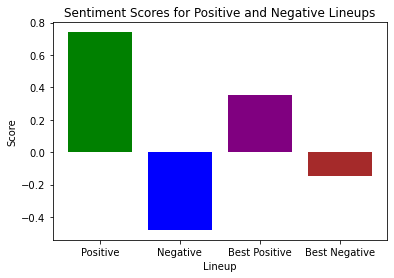

In [59]:
def graph_gen(): #generates a graph based on the above functions
    Lineups = ['Positive', 'Negative', 'Best Positive', 'Best Negative']
    Sents = [pos_find(sentiment_finder(nta)), neg_find(sentiment_finder(nta)), best_pos_lin(rank_gen(), sentiment_finder(nta)), wst_pos_lin(rank_gen(), sentiment_finder(nta))]
    New_Colors = ['green','blue','purple','brown','teal']
    plt.bar(Lineups, Sents, color = New_Colors) #makes a bar chart of average sentiment scores per lineup
    plt.title('Sentiment Scores for Positive and Negative Lineups')
    plt.xlabel('Lineup')
    plt.ylabel('Score')
    plt.show()

In [62]:
def info_gen(): #creates a new dataframe containing basic information from last year's NFL fantasy season
    url = 'https://www.fantasypros.com/nfl/reports/leaders/'
    r = pd.read_html(url)
    p_scored = r[0]
    p_scored['Player'] = p_scored['Player'].astype(str) #turns player column into strings

In [63]:
p_scored['Positivity'] = ' '

#goes one by one through each player in new dataframe and adds their sentiment score to a column    
c = 0
z = []
for p in p_scored["Player"]:
    lol = nta[(nta.player == p)]
    e = sentiment_finder(lol)
    if len(e) == 1: #if it somehow comes up with multiple tuples, it only appends the first one to the list
        z.append(float(e[0][0]))
    else:
        z.append(' ')

p_scored['Positivity'] = z
p_scored 
    
    
    

,Rank,Player,Team,Position,Points,Games,Avg,Positivity
0,1,Josh Allen,BUF,QB,417.7,17,24.6,0.0
1,2,Justin Herbert,LAC,QB,395.6,17,23.3,
2,3,Tom Brady,TB,QB,386.7,17,22.8,0.0
3,4,Patrick Mahomes II,KC,QB,374.2,17,22.0,
4,5,Matthew Stafford,LAR,QB,346.8,17,20.4,
...,...,...,...,...,...,...,...,...
749,749,Racey McMath,TEN,WR,-1.2,6,-0.2,
750,751,Trenton Cannon,Multi,RB,-1.6,10,-0.2,
751,752,J.J. Koski,LAR,WR,-2.0,3,-0.7,
752,752,Travis Benjamin,SF,WR,-2.0,5,-0.4,


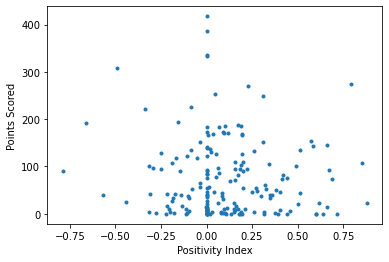

In [258]:
#attempt at plotting sentiment score vs points scored to see correlation
graphy = p_scored[(p_scored.Positivity != ' ')] #only players who received score
points = []
posi = []

for p in graphy["Points"]:
    points.append(p)
    
for p in graphy["Positivity"]:
    posi.append(p)
    
plt.plot(posi, points, '.')
plt.xlabel('Positivity Index')
plt.ylabel('Points Scored');

In [64]:
#saving new dataframe so that I don't have to do the above again
p_scored.to_csv('NFL_Data.csv', index=False)

In [65]:
nfl = pd.read_csv('NFL_Data.csv')
nfl = nfl[(nfl.Positivity != ' ')]
nfl['Positivity'] = nfl['Positivity'].astype(float)
nfl.corr()['Points'].sort_values(ascending=False) #trying to see if correlation between other information and fantasy points scored

Points        1.000000
Avg           0.945173
Games         0.661318
Positivity   -0.063175
Rank         -0.858026
Name: Points, dtype: float64

In [66]:
#Linear Regression Attempt
model = LinearRegression()
# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
y = nfl.iloc[:, 4]
X = nfl.iloc[:, 5:8]
# Fit the model to the full dataset
model.fit(X, y)
# Print out the R^2 for the model against the full dataset
print(f"R^2: {model.score(X,y)}")
print(f"Adjusted R^2: {1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)}")

R^2: 0.9259349461536129
Adjusted R^2: 0.9246866587292356


In [67]:
# print out intercept
print(model.intercept_)
# print out other coefficients
print(model.coef_)

nfl

-33.61086059054598
[ 3.10665198 13.33770306  6.10273311]


,Rank,Player,Team,Position,Points,Games,Avg,Positivity
0,1,Josh Allen,BUF,QB,417.7,17,24.6,0.000000
2,3,Tom Brady,TB,QB,386.7,17,22.8,0.000000
5,6,Aaron Rodgers,GB,QB,336.3,16,21.0,0.000000
6,7,Jonathan Taylor,IND,RB,333.1,17,19.6,0.000000
11,12,Kirk Cousins,MIN,QB,307.3,16,19.2,-0.492700
...,...,...,...,...,...,...,...,...
735,654,Daurice Fountain,KC,WR,0.0,1,0.0,-0.222833
738,738,Nate McCrary,BAL,RB,-0.1,1,-0.1,0.718400
739,738,Kurt Benkert,GB,QB,-0.1,1,-0.1,0.182500
740,741,Chase Daniel,LAC,QB,-0.2,1,-0.2,0.599400


In [68]:
model.predict([[17,24.6,1]])

array([353.41245157])